In [3]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['axes.unicode_minus'] = False
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
import konlpy
import re
from tqdm import tqdm
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

In [4]:
data = pd.read_csv("안랩통합본.csv",encoding='utf8')

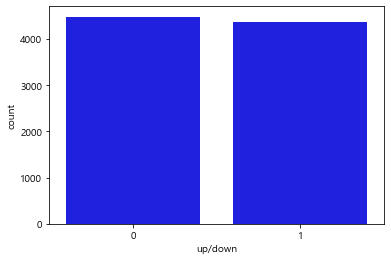

In [5]:
sns.countplot(data['up/down'], color='blue')  
plt.show()

In [6]:
kkoma = konlpy.tag.Kkma()

In [7]:
my_text_clean = []
for a_line in data['content']:
    a_line = re.sub('\d+',' ', a_line)           # 수치 스페이스로 대체.
    a_line = re.sub('[-!?()&>~+.,▶◆ㆍ&+;=_#;=▲◇△■@⊙■※△★%▷→中小企業者: /◇<·”"‘“’''"]',' ',a_line)    # 특수문자 스페이스로 대체.
    a_line = re.sub('\n',' ',a_line)             # line return 스페이스로 대체.
    a_line = re.sub('[\[\]]', ' ',a_line)        # 대괄호 스페이스로 대체.
    a_line = re.sub('ㅜ|ㅠ', ' ', a_line)        # 단모음 스페이스로 대체.
    a_line = re.sub('([a - zA - Z0 - 9_. + -] +@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)', ' ', a_line)  # 이메일 제거
    a_line = re.sub('[-= +,  # /\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]',' ',a_line)  # 특수문자 스페이스로 대체.
#    a_line = re.sub(no_meaning, ' ', a_line)     # 특별한 의미 없는 단어 스페이스로 대체.
    a_line = re.sub('\n', ' ', a_line)  # line return 스페이스로 대체.
    a_line = re.sub('\s+', ' ', a_line)          # 잉여 스페이즈 줄임.
    my_text_clean += [a_line]   

In [8]:
data['clear_content'] = my_text_clean

In [9]:
data

,datetime,content,up/down,clear_content
0,2018-12-18,■산업통상자원부 ◇과장급 전보 △전력진흥과장 박찬기 △구주통상과장 송주호 △자유무역...,0,산업통상자원부 과장급 전보 전력진흥과장 박찬기 구주통상과장 송주호 자유무역협정정책...
1,2018-12-18,스펙보다 실무 경험을 중시하는 요즘 채용시장에서 ‘인턴십’은 구직자의 업계에 대한 ...,0,스펙보다 실무 경험을 중시하는 요즘 채용시장에서 인턴십 은 구직자의 업계에 대한 열...
2,2018-12-18,■한국도로공사 ◇부처장급 △미래전략처 미래전략팀장 최세욱 △재무처 자금팀장 김기환 ...,0,한국도로공사 부처장급 미래전략처 미래전략팀장 최세욱 재무처 자금팀장 김기환 영업처...
3,2018-12-18,△승진<부사장>▷김기인 최고재무책임자(CFO)<상무보>▷안정보 글로벌사업본부장▷정청...,0,승진 부사장 김기인 최고재무책임자 CFO 상무보 안정보 글로벌사업본부장 정청환 엔...
4,2018-12-18,올해 하반기에도 국내 시장에는 다양한 신제품과 신기술이 쏟아졌다. 이들 신제품은 고...,0,올해 하반기에도 국내 시장에는 다양한 신제품과 신기술이 쏟아졌다 이들 신제품은 고객...
...,...,...,...,...
8852,2017-03-13,"지난 1월 12일 8,050원였던 코스닥 상장사 DSR제강의 주가는 이달 10일 장...",1,지난 월 일 원였던 코스닥 상장사 DSR제강의 주가는 이달 일 장중 만 원까지 치솟...
8853,2015-05-29,팬택이 살아남기를 바랐다. 모두들 힘들 거라고 예상했고 솔직히 나 역시 같은 생각이...,1,팬택이 살아남기를 바랐다 모두들 힘들 거라고 예상했고 솔직히 나 역시 같은 생각이었...
8854,2013-08-16,게임 사이트에서 카드 결제를 할 경우 소액이라도 공인인증서와 휴대폰 인증을 모두 받...,1,게임 사이트에서 카드 결제를 할 경우 소액이라도 공인인증서와 휴대폰 인증을 모두 받...
8855,2011-12-26,미술평론가와 큐레이터들이 '향후 국내외 활동이 가장 기대되는 젊은 작가'로 미디어 ...,1,미술평론가와 큐레이터들이 향후 국내외 활동이 가장 기대되는 젊은 작가 로 미디어 아...


In [10]:
with open('stopword.txt', 'r',encoding='utf8') as f:
    word = f.read()
stopword = word.splitlines()

In [11]:
tfidf = TfidfVectorizer(tokenizer=kkoma.nouns, max_features = 1000, min_df = 100, max_df = 0.7, stop_words =stopword )

In [12]:
vectorizer =tfidf.fit_transform(data['clear_content'])

D:\python2020\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['간에', '개의', '거', '걱', '견지', '결과', '결론', '경', '경닷컴', '경제', '경제신문', '경향', '고려', '곳', '공동', '공사', '관', '관계', '관련', '구체적', '구토', '국민', '그중', '근거', '기대', '기업', '기점', '기준', '김', '까닭', '나머지', '남', '내일', '년도', '누', '닷컴', '대로', '데', '데일리', '도달', '도착', '동시', '동아', '됏', '따름', '때문', '라', '라도', '랏', '마라', '만', '만이', '만큼', '말고', '머니', '메', '메쓰겁', '무엇때문', '문화', '바', '밖', '반대', '방면', '번째', '본대', '부류', '불문', '뿐', '사람', '산', '상대적', '생각', '생명', '서술', '서울', '세계', '수', '수록', '시작', '시초', '쓰겁', '아래', '아무', '아시아', '앞', '어기', '연', '연관', '연합', '옆', '외', '우', '위', '윗', '으', '은행', '의거', '의지', '이', '이드', '이외', '이용', '이유', '인사', '인삼', '일반적', '일보', '임', '입각', '입장', '점', '정도', '제외', '조', '조선', '종합', '주저', '줄', '중', '중소기업', '중앙', '중의', '즈음', '지', '지경', '쪽', '차', '총적', '칼', '켠', '터', '텍스', '투데이', '투자', '파이낸셜', '편', '하구', '하면', '한국',

In [13]:
print(tfidf.get_feature_names())

['가격', '가격제한폭', '가기', '가능', '가능성', '가량', '가스', '가운데', '가입', '가지', '가치', '가희', '간', '감사', '감소', '감염', '강', '강세', '강준수', '강화', '개', '개발', '개선', '개월', '개인', '개인정보', '개인투자자', '개최', '거래', '거래량', '거래소', '거래일', '거사', '건', '건설', '검사', '검색', '검증', '게임', '결과', '결정', '결제', '경', '경기', '경닷컴', '경영', '경우', '경쟁', '경제', '경험', '계속', '계약', '계좌', '계획', '고', '고객', '고려', '고민', '곳', '공개', '공격', '공격자', '공공', '공급', '공동', '공시', '공식', '공유', '과거', '과정', '과학', '관', '관계', '관계자', '관련', '관련주', '관리', '관심', '관제', '광림', '광물', '교수', '교육', '구', '구독', '구독신청', '구매', '구성', '구조', '구축', '국', '국가', '국내', '국민', '국제', '국회', '군', '권', '권치중', '규', '규모', '그동안', '그룹', '글', '글로벌', '금', '금리', '금속', '금지', '금호', '급', '급등', '급락', '기', '기간', '기계', '기관', '기기', '기능', '기대', '기대감', '기록', '기반', '기본', '기사', '기사구매', '기술', '기아', '기아차', '기업', '기자', '기존', '기준', '기회', '기획', '길', '김', '김홍선', '나라', '낙폭', '날', '남', '내', '내림세', '내부', '내용', '네오', '네오이녹스', '네이버', '네트', '네트워크', '넥', '넷', '년간', '노', '노력', '노베이션', '논란', '누리', '누리당', '눈', '뉴', '뉴욕', '뉴욕증시', '다

In [14]:
X= vectorizer

In [15]:
X.shape

(8857, 1000)

In [16]:
Y=data.loc[:, 'up/down'].values

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

In [18]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
Y_pred = LR.predict(x_test)
print( "Logistic regression accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

Logistic regression accuracy : 0.605


In [19]:
score = cross_val_score(LR,X,Y)
print('로지스틱 회귀 교차검증 점수 : {:2f}'.format(score.mean()))

로지스틱 회귀 교차검증 점수 : 0.499605


In [20]:
forest = RandomForestClassifier(n_estimators=30)
score1 = cross_val_score(forest,X,Y )
print('랜덤포레스트 교차검증 점수 : {:2f}'.format(score1.mean()))

랜덤포레스트 교차검증 점수 : 0.503557


In [21]:
n_estimators_grid = np.arange(20, 50,2)
depth_grid = np.arange(1, 10)
min_samples_leaf_grid = np.arange(10,21,2)
parameters = {'n_estimators': n_estimators_grid, 'max_depth': depth_grid, 'min_samples_leaf':min_samples_leaf_grid}
gridCV = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10, n_jobs=-1)
gridCV.fit(x_train, y_train)
best_n_estim = gridCV.best_params_['n_estimators']
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']
print("Random Forest best n_estimator : " + str(best_n_estim))
print("Random Forest best max_depth : " + str(best_depth))
print("Random Forest best min_samples_leaf : " + str(best_min_samples_leaf))

Random Forest best n_estimator : 42
Random Forest best max_depth : 9
Random Forest best min_samples_leaf : 14


In [22]:
RF_best = RandomForestClassifier(n_estimators=30,max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,random_state=123)
RF_best.fit(x_train, y_train)
Y_pred = RF_best.predict(x_test)
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

Random Forest best accuracy : 0.589


In [23]:
RF_best = RandomForestClassifier(n_estimators=best_n_estim,max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,random_state=123)
RF_best.fit(x_train, y_train)
Y_pred = RF_best.predict(x_test)
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),3)))

Random Forest best accuracy : 0.599


In [9]:
#파이썬 진행바
from tqdm import tqdm

In [11]:
temp=[]
text = list(data['clear_content'])
for i in tqdm(range(len(text))):
    temp_X = []
    temp_X = okt.morphs(text[i], stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopword] # 불용어 제거
    temp_X = [word for word in temp_X if len(word) > 1]
    temp.append(temp_X)

100%|████████████████████████████████████████████████████████████████████████████| 12000/12000 [07:51<00:00, 25.44it/s]


In [12]:
len(text)

12000

In [14]:
data['tokenize_content'] = temp

In [15]:
data

,datetime,content,up/down,clear_content,tokenize_content
0,2019-04-18,[머니투데이 창조기획팀 이동오 기자] [글로벌 여행 액티비티 예약 플랫폼 와그(WA...,0,머니투데이 창조기획팀 이동오 기자 글로벌 여행 액티비티 예약 플랫폼 와그 WAUG...,"[머니투데이, 창조, 기획, 동오, 기자, 글로벌, 여행, 티비, 예약, 플랫폼, ..."
1,2019-04-18,IBK기업은행은 인도 뉴델리 소재 IIT(Indian Institute of Tec...,0,IBK기업은행은 인도 뉴델리 소재 IIT Indian Institute of Tec...,"[IBK, 기업은행, 인도, 뉴델리, 소재, IIT, Indian, Institut..."
2,2019-04-18,[머니투데이 박광범 기자] 최성재 IBK기업으행 글로벌사업부 본부장(왼쪽)과 산지브...,0,머니투데이 박광범 기자 최성재 IBK기업으행 글로벌사업부 본부장 왼쪽 과 산지브 ...,"[머니투데이, 박광범, 기자, 최성재, IBK, 기업, 글로벌, 사업, 본부장, 왼..."
3,2019-04-18,[머니투데이 양태연 머니투데이방송 PD] \n\n\n\n<시장을 이겨라>\n\n이슈...,0,머니투데이 양태연 머니투데이방송 PD 시장을 이겨라 이슈를 꿰뚫어 보는 눈 시장을...,"[머니투데이, 태연, 머니투데이, 방송, PD, 시장, 이기다, 이슈, 꿰뚫다, 보..."
4,2019-04-18,안정적인 채권 이자수익과 더불어 페어트레이딩 전략으로 초과수익을 추구하는 미래에셋스...,0,안정적인 채권 이자수익과 더불어 페어트레이딩 전략으로 초과수익을 추구하는 미래에셋스...,"[안정, 채권, 이자, 수익, 더불다, 페어, 트레이딩, 전략, 초과, 수익, 추구..."
...,...,...,...,...,...
11995,2010-05-06,"제6구단이 탄생할까, 아니면 4개 팀으로 축소될까.\n배구계가 뒤숭숭하다. 2009...",0,제 구단이 탄생할까 아니면 개 팀으로 축소될까 배구계가 뒤숭숭하다 V리그가 막을 내...,"[구단, 탄생, 하다, 아니다, 축소, 되다, 배구, 숭숭, 리그, 내리다, 자유,..."
11996,2010-04-26,한국투자증권의 ‘한국투자한국의힘증권1’ 펀드는 세계 경쟁력을 갖춘 한국의 대표 기업...,1,한국투자증권의 한국투자한국의힘증권 펀드는 세계 경쟁력을 갖춘 한국의 대표 기업에 집...,"[한국, 투자, 증권, 한국, 투자, 한국, 증권, 펀드, 세계, 경쟁력, 갖추다,..."
11997,2010-04-23,세계경제의 빠른 회복세 속에 정보통신(IT) 산업이 호황을 기록하면서 국내 기업들 ...,0,세계경제의 빠른 회복세 속에 정보통신 IT 산업이 호황을 기록하면서 국내 기업들 실...,"[세계, 경제, 빠르다, 회복, 정보, 통신, IT, 산업, 호황, 기록, 하다, ..."
11998,2010-04-22,세계경제의 빠른 회복세 속에 정보통신(IT) 산업이 호황을 기록하면서 국내 기업들 ...,0,세계경제의 빠른 회복세 속에 정보통신 IT 산업이 호황을 기록하면서 국내 기업들 실...,"[세계, 경제, 빠르다, 회복, 정보, 통신, IT, 산업, 호황, 기록, 하다, ..."


In [16]:
data = data.drop('content', 1)

In [19]:
data = data.drop('clear_content', 1)

KeyError: "['clear_content'] not found in axis"

In [20]:
#tokenized_doc = data['tokenize_content']

In [39]:
#TfidfVectorizer는 기본적으로 토큰화가 되어있지 않은 텍스트 데이터를 입력으로 사용한다. 
#그렇기 때문에 TfidfVectorizer를 사용해서 TF-IDF 행렬을 만들기 위해서 다시 토큰화 작업을 역으로 취소하는 역토큰화(Detokenization) 작업을 수행해본다.

# 역토큰화
#detokenized1 = []
#for i in text:
    t = ''.join(tokenized_doc[i])
    detokenized1.append(t)


KeyError: ' 머니투데이 창조기획팀 이동오 기자 글로벌 여행 액티비티 예약 플랫폼 와그 WAUG 시리즈C 투자 유치 글로벌 여행 액티비티 예약 플랫폼 와그 WAUG 를 서비스하는 ㈜와그트래블 대표 선우윤 이 시리즈C 투자를 유치했다고 일 밝혔다 사진제공 와그트래블이번 투자는 기존 투자사인 LB인베스트먼트 컴퍼니K파트너스를 비롯해 신규 주주로 SBI인베스트먼트 알바트로스인베스트먼트 로그인베스트먼트 델타인베스트먼트 그리고 IBK기업은행이 참여했다 투자 금액은 억원이다 여기에 신용보증기금의 퍼스트펭귄기업 선정으로 억원을 추가 확보했다 업체 측은 년 와그 서비스 출시 후 누적 투자액은 억원으로 국내 단일 액티비티 예약 플랫폼으로는 최대 규모 라고 설명했다 와그는 현재 여 개 도시 만여 개의 여행 액티비티 상품을 판매 중이다 년 서비스 출시 후 연평균 의 매출 성장을 이뤄냈으며 모바일 결제 비율이 로 모바일에 가장 최적화된 자유여행 서비스로 평가받고 있다 올해 월에는 본격적으로 해외 시장에 진출했다 매월 건 이상의 해외 사용자의 결제가 이뤄지고 있으며 이상이 싱가포르 필리핀 등 동남아시아 사용자다 와그는 경쟁이 치열한 국내 여행 액티비티 시장에 안주하지 않고 글로벌 시장을 개척해 규모와 성장세를 더욱 가속한다는 계획이다 이미 싱가포르 법인과 일본 지사를 설립했으며 연내 홍콩 태국 필리핀 등 동남아시아 주요 국가에 진출할 계획이다 또한 현지에 전문 인력을 채용해 현지 제휴와 마케팅을 강화할 예정이다 자체 브랜드 PB 투어인 와그 핑크 시리즈도 강화한다 현재 개 국가에서 운영되고 있는 와그 핑크 시리즈는 괌 와그 핑크 돌핀크루즈 방콕 와그 핑크 왕궁 투어 등 총 개가 있는데 올해 개까지 늘릴 계획이다 이번 투자를 주도한 SBI인베스트먼트의 황규진 팀장은 와그는 이미 높은 상품 콘텐츠 퀄리티와 판매량을 기반으로 경쟁사 대비 안정적인 수익성을 갖고 있는 서비스 라며 강력한 한국 아웃바운드 시장을 기반으로 일본 및 동남아에 성공적으로 안착해 아시아 대표 액티비티 플랫폼으로 자리잡을 것으로 기대한다 고 말했다 선우윤 와그트래블 대표는 그동안 여행 관련한 한국 기업이 글로벌로 진출한 사례가 단 한 번도 없었다 며 와그는 누구도 도전하지 않았던 글로벌 시장에서 한국 기업의 우수성을 증명해 보일 것 이라고 말했다 한편 와그트래블은 이번 투자 유치를 계기로 글로벌 OTA 경험이 있는 인재를 다수 채용할 계획이다 '